# Task 1

In [1]:
from DMXEnttecPro import Controller
# DMXEnttecPro package is used to control the tunable loght source
import numpy as np
import luxpy as lx
import matplotlib.pyplot as plt 
import time


In [ ]:



def open_DMX():
   dmx = Controller('COM8',auto_submit=True, dmx_size=256)  # Typical of Windows
   return dmx

def close_DMX(dmx):
   dmx.close()

def send(dmx, R,G,B,WW,A,UV=0):


   dmx.set_channel(1, R)
   dmx.set_channel(2, G)
   dmx.set_channel(3, B)
   dmx.set_channel(4, WW)
   dmx.set_channel(5, A)
   dmx.set_channel(6, UV)  
   dmx.submit()

# channel 1,2,3,4,5,6 are the red, green, blue, warm white, amber, and UV channels respectively. UV is default set to 0.
 

In [75]:
dmx = open_DMX()

In [76]:
send(dmx, 0,0,0,0,0)

In [5]:
close_DMX(dmx)


# Task 2

In [71]:
from luxpy import spectro as sp
sp.init('jeti')
# initializes the spectrometer 


<module 'luxpy.toolboxes.spectro.jeti.jeti' from 'c:\\Users\\amrit\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\luxpy\\toolboxes\\spectro\\jeti\\jeti.py'>

In [72]:
sp.jeti.set_laser(laser_on = False)
# laser_on is turned "True" to set the spectrometer at the correct location using the laser pointer.

{'SetLaserIntensity': 0,
 'OpenDevice': 0,
 'GetNumDevices': 0,
 'SetLaserStat': 0,
 'CloseDevice': 0}

In [11]:
# here I record the spectrums for each channel for a range of driver values. I select the driver values such that we record the spectrums
# at steps of 2 driver values from 1 to 10 and then at steps of 5 from 10 to 255.
# This is done as I encountered some problem in getting the correct luminance with lower driver values. Thus the steps of the recordings are made
# small such that it is more sensitive in case of lower driver values. 

range_ = np.concatenate([np.arange(1,10,2),np.arange(15,256,10)])
Y_ = np.zeros([6,len(range_)])

spd = []
# spd[j] has the values of each temp_spd_ch
# spd[j][i] has two values in them, one of wavelength and other of power for the jth channel
# spd[j][i][0] has the wavelengths
# spd[j][i][1] has the powers
# where j varies from 0 to 5 and i varies from o to 24



for j in np.arange(1,6,1):

    send(dmx, 0,0,0,0,0)
    temp_spd_ch = []
    dr_value = []
    # each temp_spd_ch[i] has two values in them, one of wavelengths and other of power
    # each temp_spd_ch[i][0] has the values of wavelengths
    # each temp_spd_ch[i][1] has the values of power values of each wavelengths
    # where i varies from 0 to 24    
    for n,i in enumerate(range_):
        dmx.set_channel(j,i)
        temp_spd_ch.append(sp.jeti.get_spd())
        y = lx.spd_to_power(temp_spd_ch[n], ptype = 'pu', cieobs = '1964_10')
        Y_[j,n] = y
        dr_value.append(i)   
        print(f"driver value {i}")
        time.sleep(0.5)
    spd.append(temp_spd_ch)
    

Iteration 1
Iteration 3
Iteration 5
Iteration 7
Iteration 9
Iteration 15
Iteration 25
Iteration 35
Iteration 45
Iteration 55
Iteration 65
Iteration 75
Iteration 85
Iteration 95
Iteration 105
Iteration 115
Iteration 125
Iteration 135
Iteration 145
Iteration 155
Iteration 165
Iteration 175
Iteration 185
Iteration 195
Iteration 205
Iteration 215
Iteration 225
Iteration 235
Iteration 245
Iteration 255
Iteration 1
Iteration 3
Iteration 5
Iteration 7
Iteration 9
Iteration 15
Iteration 25
Iteration 35
Iteration 45
Iteration 55
Iteration 65
Iteration 75
Iteration 85
Iteration 95
Iteration 105
Iteration 115
Iteration 125
Iteration 135
Iteration 145
Iteration 155
Iteration 165
Iteration 175
Iteration 185
Iteration 195
Iteration 205
Iteration 215
Iteration 225
Iteration 235
Iteration 245
Iteration 255
Iteration 1
Iteration 3
Iteration 5
Iteration 7
Iteration 9
Iteration 15
Iteration 25
Iteration 35
Iteration 45
Iteration 55
Iteration 65
Iteration 75
Iteration 85
Iteration 95
Iteration 105
Iterati

In [12]:
# "Y_" has the luminance values of each recorded driver values for each channel
np.save('_Y_.npy',Y_)
# "spd" has the spectrums of each recorded driver values for each channel
np.save('spd_all_channel.npy', spd)

Text(0, 0.5, 'Luminance(cd/m^2)')

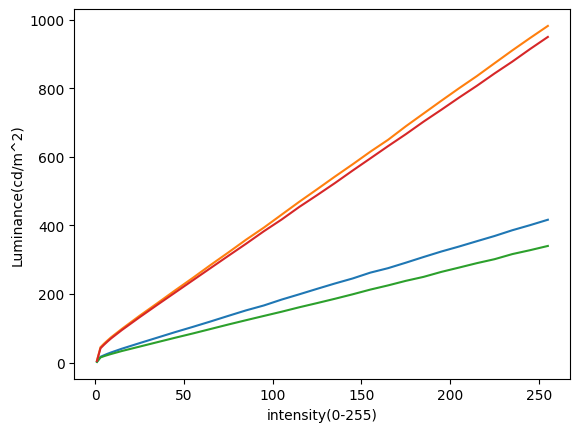

In [2]:
# plotting the driver values with its corresponding luminance for each channel 
Y_ = np.load('_Y_.npy')
spd = np.load('spd_all_channel.npy')
range_ = np.concatenate([np.arange(1,10,2),np.arange(15,256,10)])

fig = plt.figure()

for i in np.arange(1,5,1):
   plt.plot(range_, Y_[i,:])
   
plt.xlabel("intensity(0-255)")
plt.ylabel("Luminance(cd/m^2)")
# Y_[1,:] gives the luminance of each driver values recorded of channel 1 i.e "Red" and similarly for Y_[2,:], ...

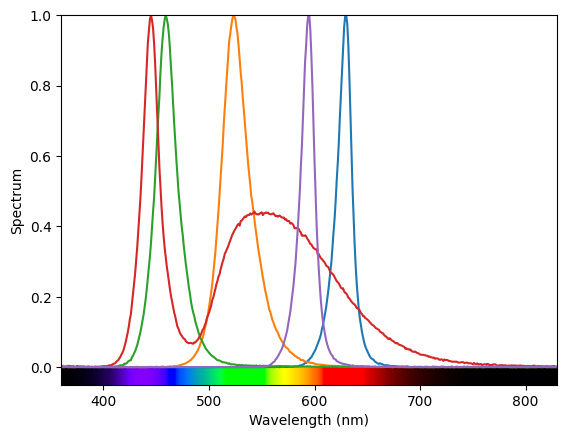

In [3]:
#plotting spectrums of each channel with a driver value of 255 (index value of 24)

spd = np.load('spd_all_channel.npy')

fig = plt.figure()

for i in np.arange(0,5,1):
   lx.SPD(spd[i][24], norm_type = 'max').plot()

   # lx.plot_spectrum_colors(spd[i][24])
   


            5            4             3           2
-4.779e-11 x + 5.51e-08 x - 2.346e-05 x + 0.00452 x + 0.2564 x - 1.143
           5             4             3             2
-6.95e-13 x + 1.933e-09 x - 1.981e-06 x + 0.0009091 x + 0.09296 x - 1.136
            5             4             3           2
-1.237e-10 x + 1.222e-07 x - 4.448e-05 x + 0.00723 x + 0.2861 x - 1.164
            5             4             3            2
-8.613e-13 x + 2.291e-09 x - 2.245e-06 x + 0.000989 x + 0.09301 x - 0.9341
            5             4             3           2
-6.905e-11 x + 7.542e-08 x - 3.032e-05 x + 0.00561 x + 0.2081 x - 0.8159


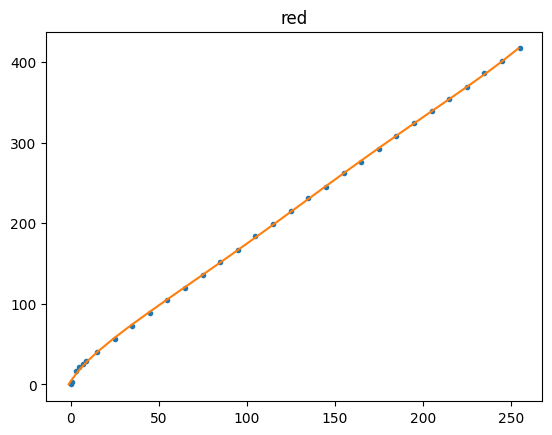

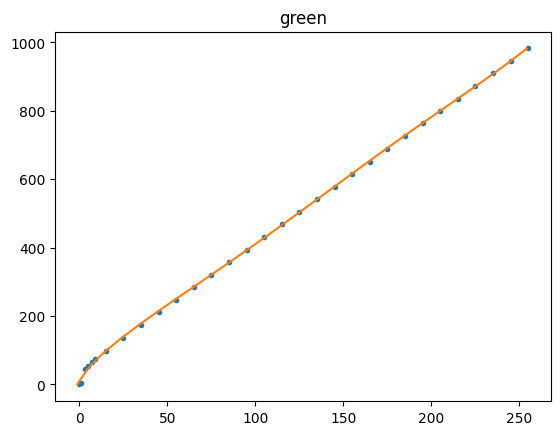

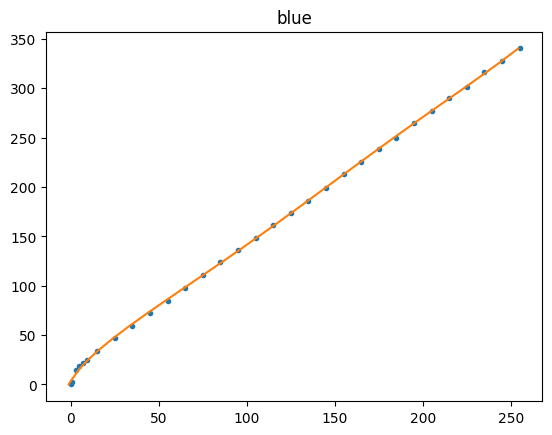

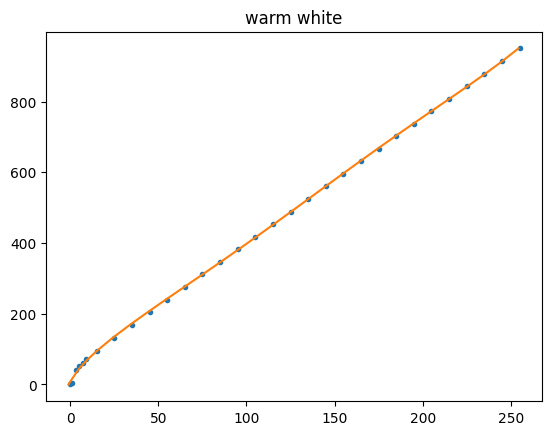

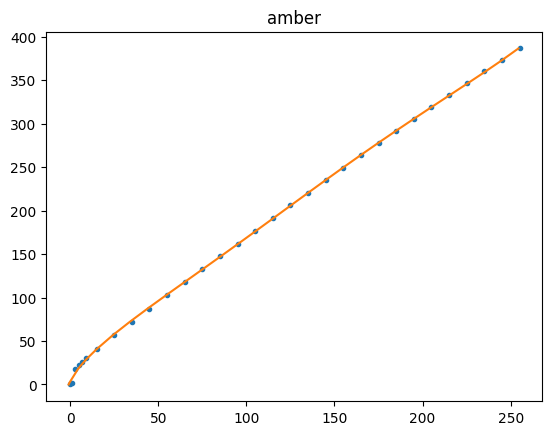

In [4]:
# curve fitting with a polynomial function for calibration:

p = [0]
name = ['red','green','blue','warm white','amber']

for i in np.arange(1,6,1):
   X = range_
   # y = Y_[1,:]/np.max(Y_[1,:])
   y = Y_[i,:]

   X = np.insert(X,0,0)
   y = np.insert(y,0,0)


   z = np.polyfit(y, X, 5)
   p.append(np.poly1d(z))
   print(p[i])
   plt.figure()
   plt.plot(X, y, '.', p[i](y), y, '-')
   plt.title(name[i-1])





# Task 3

In [88]:
import luxpy.toolboxes.spdbuild as spb 

# define the test spectrum

xyz_t = np.array([[100,100,100]])
Yxy_t = np.array([[100,1/3,1/3]])



def get_driver_values(xyz_t,Yxy_t,drv_ind,n_prims,color): 

   # Get RGB as primaries



   # send(dmx, 255,0,0,0,0)
   # time.sleep(0.5)
   # spd_r = sp.jeti.get_spd()
   # send(dmx, 0,255,0,0,0)
   # time.sleep(0.5)
   # spd_g = sp.jeti.get_spd()
   # send(dmx, 0,0,255,0,0)
   # time.sleep(0.5)
   # spd_b = sp.jeti.get_spd()

   # send(dmx, 0,0,0,0,0)


   # spd_w = np.vstack([spd_r[0,:],spd_r[1,:], spd_g[1,:], spd_b[1:]]) # first row is wavelengths, second row for red powers, third row for green powers, etc


   #or

   







   # spd[0] is for red, spd[1] is for blue,... spd[4] is for amber.









   if n_prims == 3:


      c= np.array(color) 

      ch, = np.where(c == 1)

      spd_mix = np.vstack([spd[0][drv_ind][0],spd[ch[0]][drv_ind][1], spd[ch[1]][drv_ind][1], spd[ch[2]][drv_ind][1]])



      print(spd_mix.shape)


      xyz_p = lx.spd_to_xyz(spd_mix, relative = False)
      Yxy_p = lx.xyz_to_Yxy(xyz_p)
      print(xyz_p)


      # we determine the weights for each primaries

      w_xyz = spb.colormixer_pinv(xyz_t,xyz_p,input_fmt='xyz') # mixing using xyz
      w_Yxy = spb.colormixer_pinv(Yxy_t,Yxy_p,input_fmt='Yxy') # mixing using Yxy

      print('Estimated primary contributions (xyz):', w_xyz)
      print('Estimated primary contributions (Yxy):', w_Yxy)


      wt_pri = spd_mix.copy()
      for i, (n,w) in enumerate(zip(spd_mix[[1,2,3],:],w_xyz[0])):
         wt_pri[i+1] = n*w

      # print(int(p[ch[0]+1](Y_[(ch[0]+1),drv_ind]*w_xyz[0][0])),int(p[ch[1]+1](Y_[(ch[1]+1),drv_ind]*w_xyz[0][1])), int(p[ch[2]+1](Y_[(ch[2]+1),drv_ind]*w_xyz[0][2])))

      d1,d2,d3 = int(np.around(p[ch[0]+1](Y_[1,drv_ind]*w_xyz[0][0]))), int(np.around(p[ch[1]+1](Y_[2,drv_ind]*w_xyz[0][1]))), int(np.around(p[ch[2]+1](Y_[3,drv_ind]*w_xyz[0][2])))
      print(d1,d2,d3)
      # send(dmx,0,0,0,0,0)
      # dmx.set_channel(ch[0], d1)
      # dmx.set_channel(ch[1], d2)
      # dmx.set_channel(ch[2], d3)
      



   if n_prims == 4:

      c= np.array(color) 

      ch, = np.where(c == 1)

      spd_mix = np.vstack([spd[0][drv_ind][0],spd[ch[0]][drv_ind][1], spd[ch[1]][drv_ind][1], spd[ch[2]][drv_ind][1], spd[ch[3]][drv_ind][1]])

      print(spd_mix.shape)

      xyz_p = lx.spd_to_xyz(spd_mix, relative = False)
      Yxy_p = lx.xyz_to_Yxy(xyz_p)

      print(xyz_p)

      w_xyz = spb.colormixer_pinv(xyz_t,xyz_p,input_fmt='xyz') # mixing using xyz
      w_Yxy = spb.colormixer_pinv(Yxy_t,Yxy_p,input_fmt='Yxy') # mixing using Yxy
      print('\nEstimated primary contributions (xyz):', w_xyz)
      print('Estimated primary contributions (Yxy):', w_Yxy)


      wt_pri = spd_mix.copy()
      for i, (n,w) in enumerate(zip(spd_mix[[1,2,3,4],:],w_xyz[0])):
         wt_pri[i+1] = n*w

      print('\n')

      # print(int(p[ch[0]+1](Y_[(ch[0]+1),drv_ind]*w_xyz[0][0])),int(p[ch[1]+1](Y_[(ch[1]+1),drv_ind]*w_xyz[0][1])), int(p[ch[2]+1](Y_[(ch[2]+1),drv_ind]*w_xyz[0][2])),int(p[ch[3]+1](Y_[(ch[3]+1),drv_ind]*w_xyz[0][3])))

      d1,d2,d3,d4 = int(np.around(p[ch[0]+1](Y_[(ch[0]+1),drv_ind]*w_xyz[0][0]))),int(np.around(p[ch[1]+1](Y_[(ch[1]+1),drv_ind]*w_xyz[0][1]))), int(np.around(p[ch[2]+1](Y_[(ch[2]+1),drv_ind]*w_xyz[0][2]))),int(np.around(p[ch[3]+1](Y_[(ch[3]+1),drv_ind]*w_xyz[0][3])))
      print(d1,d2,d3,d4)
      # send(dmx,0,0,0,0,0)
      # dmx.set_channel(ch[0], d1)
      # dmx.set_channel(ch[1], d2)
      # dmx.set_channel(ch[2], d3)
      # dmx.set_channel(ch[3], d4)

   
   if n_prims == 5:


      c= np.array(color) 

      ch, = np.where(c == 1)

      spd_mix = np.vstack([spd[0][drv_ind][0],spd[ch[0]][drv_ind][1], spd[ch[1]][drv_ind][1],spd[ch[2]][drv_ind][1],spd[ch[3]][drv_ind][1],spd[ch[4]][drv_ind][1]])

      

      print(spd_mix.shape)


      xyz_p = lx.spd_to_xyz(spd_mix, relative = False)
      Yxy_p = lx.xyz_to_Yxy(xyz_p)
      print(xyz_p)


      # we determine the weights for each primaries

      w_xyz = spb.colormixer_pinv(xyz_t,xyz_p,input_fmt='xyz') # mixing using xyz
      w_Yxy = spb.colormixer_pinv(Yxy_t,Yxy_p,input_fmt='Yxy') # mixing using Yxy

      print('Estimated primary contributions (xyz):', w_xyz)
      print('Estimated primary contributions (Yxy):', w_Yxy)


      wt_pri = spd_mix.copy()
      for i, (n,w) in enumerate(zip(spd_mix[[1,2,3,4,5],:],w_xyz[0])):
         wt_pri[i+1] = n*w


      # print(int(p[ch[0]+1](Y_[(ch[0]+1),drv_ind]*w_xyz[0][0])),int(p[ch[1]+1](Y_[(ch[1]+1),drv_ind]*w_xyz[0][1])),int(p[ch[2]+1](Y_[(ch[2]+1),drv_ind]*w_xyz[0][2])),int(p[ch[3]+1](Y_[(ch[3]+1),drv_ind]*w_xyz[0][3])), int(p[ch[4]+1](Y_[(ch[4]+1),drv_ind]*w_xyz[0][4])))
      d1,d2,d3,d4,d5 = int(np.around(p[ch[0]+1](Y_[(ch[0]+1),drv_ind]*w_xyz[0][0]))), int(np.around(p[ch[1]+1](Y_[(ch[1]+1),drv_ind]*w_xyz[0][1]))), int(np.around(p[ch[2]+1](Y_[(ch[2]+1),drv_ind]*w_xyz[0][2]))), int(np.around(p[ch[3]+1](Y_[(ch[3]+1),drv_ind]*w_xyz[0][3]))), int(np.around(p[ch[4]+1](Y_[(ch[4]+1),drv_ind]*w_xyz[0][4])))
      print(d1,d2,d3,d4,d5)
      # send(dmx,0,0,0,0,0)
      # dmx.set_channel(ch[0], d1)
      # dmx.set_channel(ch[1], d2)
      # dmx.set_channel(ch[2], d3)
      # dmx.set_channel(ch[3], d4)
      # dmx.set_channel(ch[4], d5)


   return spd_mix,wt_pri
      

In [89]:
spd_mix,wt_pri = get_driver_values(xyz_t,Yxy_t,17,n_prims=5,color=[1,1,1,1,1])


(6, 471)
[[4.9674e+02 2.1899e+02 4.0335e-01]
 [1.2774e+02 5.1386e+02 5.5030e+01]
 [2.9864e+02 1.0030e+02 1.6894e+03]
 [4.7150e+02 4.9202e+02 5.2783e+02]
 [3.0011e+02 2.1476e+02 5.5897e-01]]
Estimated primary contributions (xyz): [[5.8955e-02 6.3297e-02 3.0434e-02 8.5355e-02 4.4302e-02]]
Estimated primary contributions (Yxy): [[5.8955e-02 6.3297e-02 3.0434e-02 8.5355e-02 4.4302e-02]]
3 3 1 5 2


<AxesSubplot: xlabel='Wavelength (nm)', ylabel='Spectrum'>

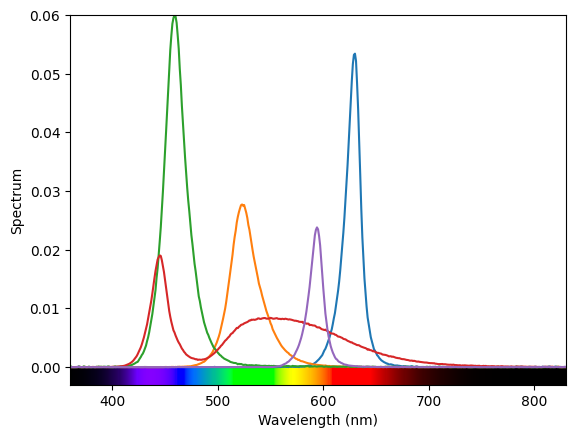

In [90]:
lx.SPD(spd_mix).plot()


[[1.0786e+02 1.0797e+02 1.1508e+02]]


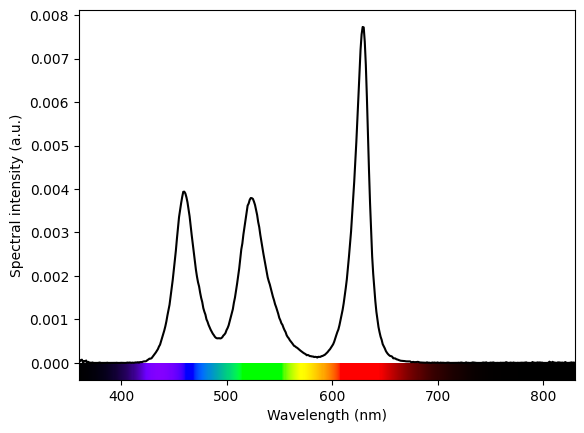

In [78]:
# testing the acquired sepctrum:
 
spd_test = sp.jeti.get_spd()
xyz_test = lx.spd_to_xyz(spd_test, relative = False)


lx.plot_spectrum_colors(spd_test)
print(xyz_test)

<AxesSubplot: xlabel='Wavelength (nm)', ylabel='Spectrum'>

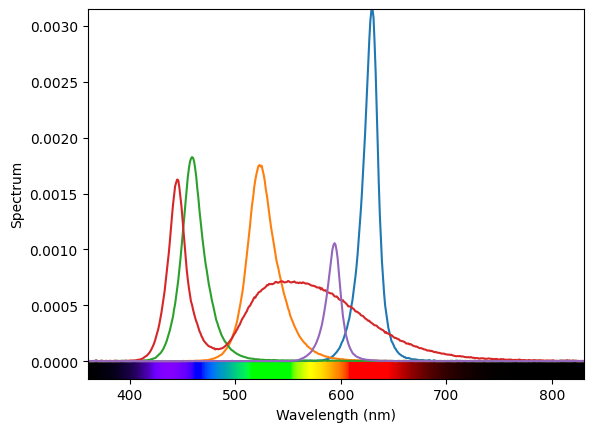

In [91]:
# plotting the same spectrum with 3 primaries with multiplying with each weigths:

 


# zip function takes two variables at the same time to work with.
# (spd_mix3[[1,2,3],:]) gives [[spd_mix3[1,:],[spd_mix3[2,:]],[spd_mix3[3,:]]]
# when we say n in (spd_mix3[[1,2,3],:]), the value of n in first iteration are [[spd_mix3[1,:]] values, in second iteration it is 
# [[spd_mix3[2,:]] values and so on...
# similarly, w in first iteration is w_xyz[0][0], w in 2nd iteration is w_xyz[0][1], etc...


# wt_pri = spd_mix.copy()
# for i, (n,w) in enumerate(zip(spd_mix[[1,2,3,4,5],:],w_xyz[0])):
#    wt_pri[i+1] = n*w



# colors = ['b','g','r']
lx.SPD(wt_pri).plot()  




### for n primaries case n = 4

In [18]:
# Get R,G,B,AM as primaries:






# spd_n = []
# for n,i in enumerate([1,2,3,4]):
#         send(dmx, 0,0,0,0,0)
#         spd_n.append = dmx.set_channel(i,255)
#         time.sleep(0.5)

# send(dmx, 0,0,0,0,0)

# spd_mix = np.vstack([spd_n[0][0,:],spd_n[0][1,:], spd_n[1][1,:], spd_n[2][1:], spd_n[3][1:]])

# xyz_p = lx.spd_to_xyz(spd_mix, relative = False)
# Yxy_p = lx.xyz_to_Yxy(xyz_p)





#or



xyz_tn = np.array([[100,100,100]])
Yxy_tn = np.array([[100,1/3,1/3]])




spd = np.load('spd_all_channel.npy')

# spd[0] is for red, spd[1] is for blue,... spd[4] is for amber.

drv_ind = 24

spd_mixn = np.vstack([spd[0][drv_ind][0],spd[0][drv_ind][1], spd[1][drv_ind][1], spd[2][drv_ind][1], spd[4][drv_ind][1]])

xyz_p = lx.spd_to_xyz(spd_mixn, relative = False)
Yxy_pn = lx.xyz_to_Yxy(xyz_p)

w_xyzn = spb.colormixer_pinv(xyz_tn,xyz_p,input_fmt='xyz') # mixing using xyz
w_Yxyn = spb.colormixer_pinv(Yxy_tn,Yxy_pn,input_fmt='Yxy') # mixing using Yxy
print('\nEstimated primary contributions (4, xyzn):', w_xyzn)
print('Estimated primary contributions (4, Yxyn):', w_Yxyn)

print('\n')

print(int(p_r(Y_[1,drv_ind]*w_xyzn[0][0])),int(p_g(Y_[2,drv_ind]*w_xyzn[0][1])), int(p_b(Y_[3,drv_ind]*w_xyzn[0][2])),int(p_am(Y_[5,drv_ind]*w_xyzn[0][3])))
# send(dmx, int(np.around(p_r(Y_[1,drv_ind]*w_xyzn[0][0]))), int(np.around(p_g(Y_[2,drv_ind]*w_xyzn[0][1]))), int(np.around(p_b(Y_[3,drv_ind]*w_xyzn[0][2]))), 0, int(np.around(p_am(Y_[5,drv_ind]*w_xyzn[0][3]))))





Estimated primary contributions (4, xyzn): [[6.4990e-02 7.6805e-02 3.7321e-02 4.9290e-02]]
Estimated primary contributions (4, Yxyn): [[6.4990e-02 7.6805e-02 3.7321e-02 4.9290e-02]]


6 7 2 3


array([[1.1695e+02, 1.1621e+02, 1.3599e+02]])

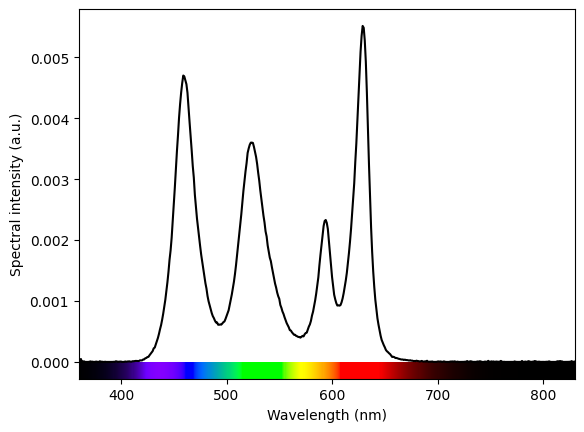

In [53]:

spd_test = sp.jeti.get_spd()
xyz_test = lx.spd_to_xyz(spd_test, relative = False)
lx.plot_spectrum_colors(spd_test)
xyz_test


<AxesSubplot: xlabel='Wavelength (nm)', ylabel='Spectrum'>

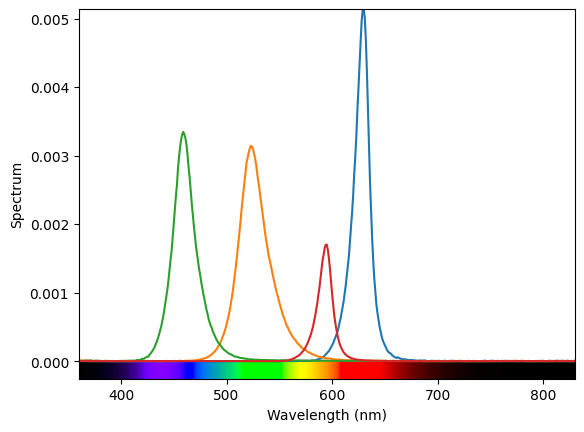

In [19]:
# Plotting spectrum with 4 primaries:

# zip function takes two variables at the same time to work with.
# (spd_mix3[[1,2,3],:]) gives [[spd_mix3[1,:],[spd_mix3[2,:]],[spd_mix3[3,:]]]
# when we say n in (spd_mix3[[1,2,3],:]), the value of n in first iteration are [[spd_mix3[1,:]] values, in second iteration it is 
# [[spd_mix3[2,:]] values and so on...
# similarly, w in first iteration is w_xyz[0][0], w in 2nd iteration is w_xyz[0][1], etc...

wt_pri = spd_mixn.copy()
for i, (n,w) in enumerate(zip(spd_mixn[[1,2,3,4],:],w_xyzn[0])):
    wt_pri[i+1] = n*w


# colors = ['b','g','r']
lx.SPD(wt_pri).plot()  

# task 4

In [102]:
# prepare target functions and initializations 

def prims_target(prims,target,Rf,Rg,Rf_wt,Rg_wt):
    cieobs = '1964_10'
    def spd_to_cris(spd):
        Rf,Rg = lx.cri.spd_to_cri(spd, cri_type='ies-tm30',out='Rf,Rg')
        return np.vstack((Rf, Rg))  

    obj_fcn = [(spd_to_cris,'Rf','Rg')]
    obj_tar_vals = [(Rf,Rg)]
    obj_wts = [(Rf_wt,Rg_wt)]

    
    

    # plt.figure
    # lx.SPD(prims).plot()


In [105]:
    
    
def perf_opt(method):

    so = spb.SpectralOptimizer(target = target, tar_type = 'Yxy', cspace_bwtf = {},
                        wlr = [360,830,1], cieobs = cieobs, 
                        out = 'spds,primss,Ms,result',
                        optimizer_type = '3mixer', triangle_strengths_bnds = None,
                        prim_constructor = None, 
                        prims = prims,
                        obj_fcn = spb.ObjFcns(f=obj_fcn, ft = obj_tar_vals, fw = obj_wts),
                        minimizer = spb.Minimizer(method),
                        verbosity = 0)


    # method='Nelder-Mead','particleswarm', 'demo'
    # start optimization:
    S,M,P = so.start(out = 'spds,Ms,primss')

    if np.isnan(S[1:]).all():
        raise Exception("Run again to try different starting values. Current ones resulted in nan's")


    # Check output agrees with target:
    xyz = lx.spd_to_xyz(S, relative = False, cieobs = cieobs)
    Yxy = lx.xyz_to_Yxy(xyz)
    cct,duv = lx.xyz_to_cct(xyz, cieobs = cieobs, out = 'cct,duv')
    Rf, Rg = spd_to_cris(S)

    print('\nResults (optimization result,target):')
    print("Yxy: ([{:1.0f},{:1.2f},{:1.2f}],[{:1.0f},{:1.2f},{:1.2f}])".format(Yxy[0,0],Yxy[0,1],Yxy[0,2],target[0,0],target[0,1],target[0,2]))
    print("Rf: ({:1.2f},{:1.2f})".format(Rf[0], obj_tar_vals[0][0]))
    print("Rg: ({:1.2f}, {:1.2f})".format(Rg[0], obj_tar_vals[0][1]))
    print("cct(K), duv: ({:1.1f},{:1.4f})".format(cct[0,0], duv[0,0]))

    print('\nFlux ratios of component spectra:', M)

    #plot spd:
    plt.figure()
    lx.SPD(S).plot()




Results (optimization result,target):
Yxy: ([600,0.33,0.33],[600,0.33,0.33])
Rf: (89.11,90.00)
Rg: (109.08, 110.00)
cct(K), duv: (5482.0,-0.0041)

Flux ratios of component spectra: [[3.0225e-01 3.6819e-01 1.8463e-01 4.3534e-01 3.0900e-01]]


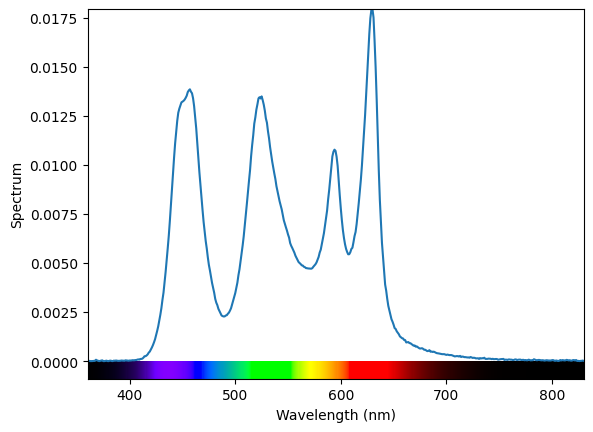

In [107]:
target = np.array([[600,1/3,1/3]]) 
prims = spd_mix

prims_target(prims, target, 90, 100, 1,1)

# method='Nelder-Mead','particleswarm', 'demo'

perf_opt('particleswarm')r09288re